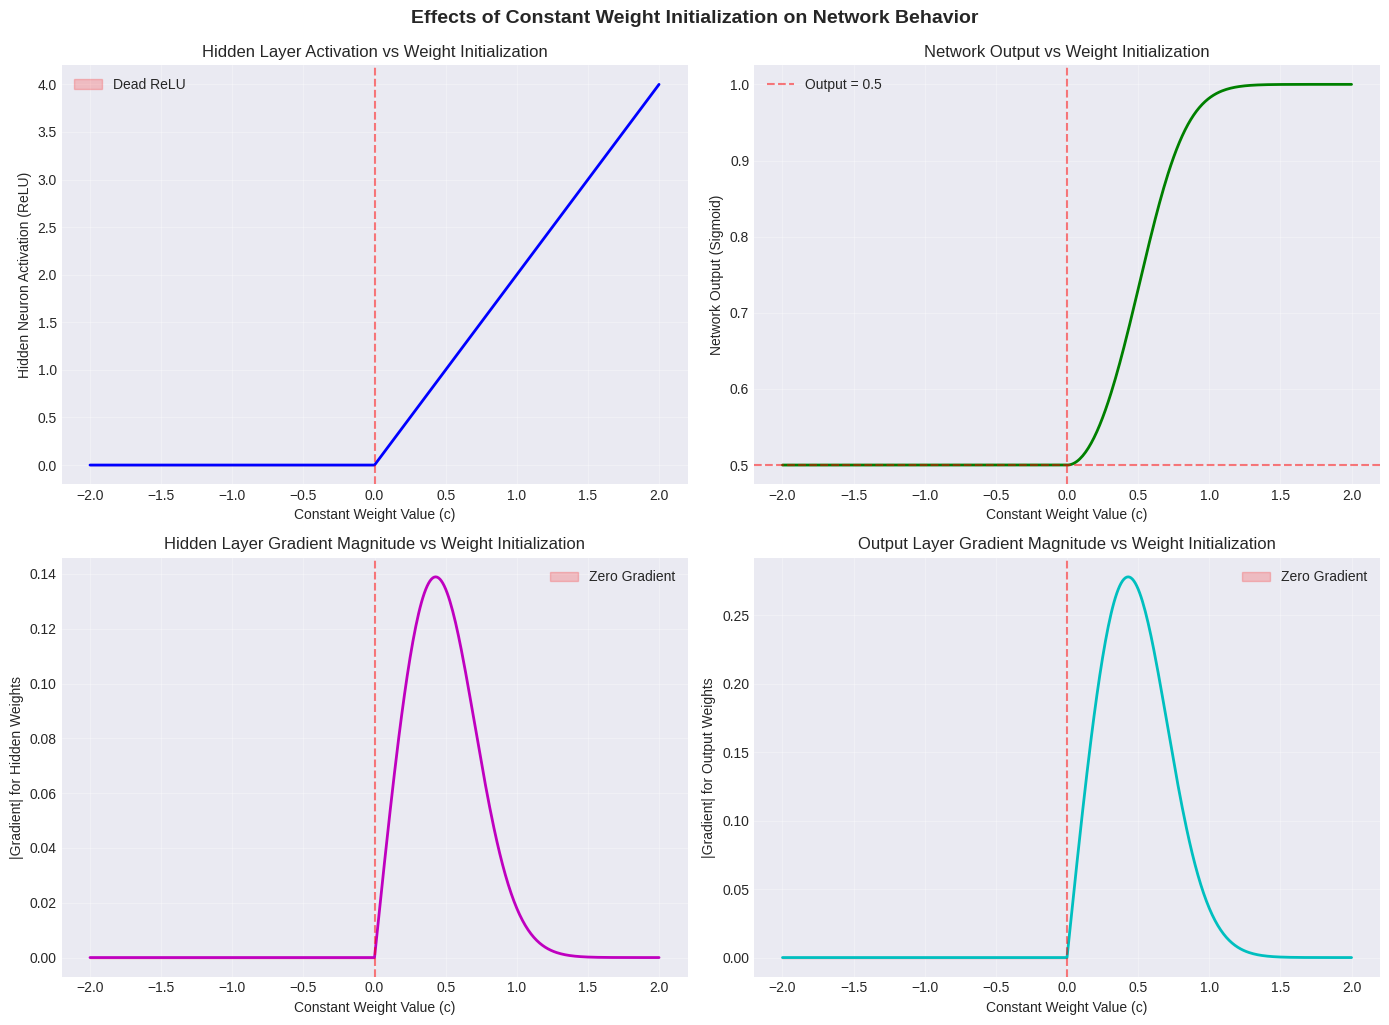

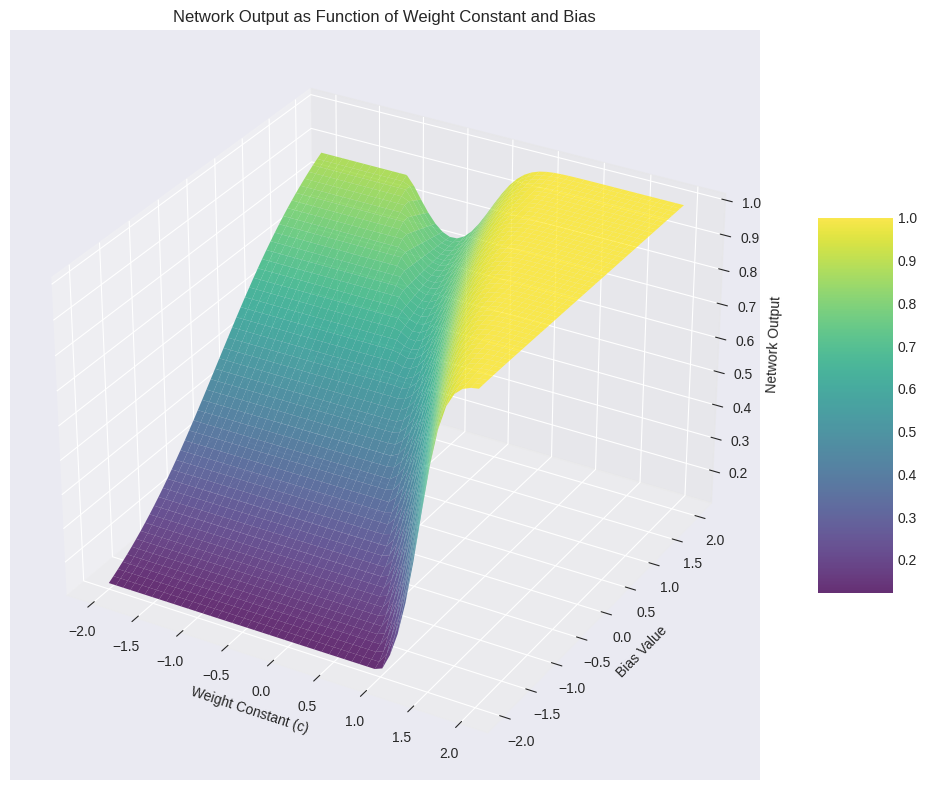

KEY OBSERVATIONS:

1. For c < 0:
   - ReLU activations are 0 (dead neurons)
   - Network output is always 0.5 (random guess)
   - Gradients are 0 for hidden layer (vanishing gradient problem)
   - This is known as the 'dying ReLU' problem

2. For c = 0:
   - All activations are 0
   - Output is 0.5
   - All gradients are 0 (complete symmetry)
   - Network cannot learn (weight updates are zero)

3. For c > 0 but small:
   - Activations are small but non-zero
   - Output approaches 0.5 from above
   - Gradients exist but are small
   - Learning is possible but slow

4. For c > 0 and large:
   - Activations are large
   - Output approaches 1 (saturation)
   - Gradients can be large but might cause instability

5. Symmetry Problem:
   - All neurons in same layer have identical outputs
   - All neurons receive identical gradients
   - Neurons cannot differentiate/specialize
   - Network loses representational power


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def forward_pass_with_constant_weights(c, X=np.array([1, 0, 1])):
    """Perform forward pass with all weights initialized to constant c"""
    # Hidden layer pre-activation
    z_hidden = np.array([c * X[0] + c * X[1] + c * X[2], 
                         c * X[0] + c * X[1] + c * X[2]])
    
    # Hidden layer activation (ReLU)
    a_hidden = np.maximum(0, z_hidden)
    
    # Output layer pre-activation
    z_output = c * a_hidden[0] + c * a_hidden[1]
    
    # Output activation (Sigmoid)
    y_hat = 1 / (1 + np.exp(-z_output))
    
    return z_hidden, a_hidden, z_output, y_hat

def compute_gradients(c, X=np.array([1, 0, 1]), y_true=1):
    """Compute gradients for all weights with constant initialization c"""
    # Forward pass
    z_hidden, a_hidden, z_output, y_hat = forward_pass_with_constant_weights(c, X)
    
    # Output layer gradients
    dL_dz_out = y_hat - y_true
    dL_dw_out = dL_dz_out * a_hidden  # Gradient for output weights
    
    # Hidden layer gradients
    dL_da_hidden = dL_dz_out * c  # c is the output weight value
    dL_dz_hidden = dL_da_hidden * (z_hidden > 0).astype(float)  # ReLU derivative
    dL_dw_hidden = np.outer(dL_dz_hidden, X)  # Gradient for hidden weights
    
    return dL_dw_hidden, dL_dw_out, y_hat

def visualize_initialization_effects():
    """Visualize the effects of constant weight initialization"""
    
    # Generate a range of constant values
    c_values = np.linspace(-2, 2, 401)
    
    # Store results
    hidden_activations = []
    outputs = []
    hidden_gradients = []
    output_gradients = []
    
    for c in c_values:
        # Forward pass
        z_hidden, a_hidden, z_output, y_hat = forward_pass_with_constant_weights(c)
        
        # Compute gradients
        dL_dw_hidden, dL_dw_out, _ = compute_gradients(c)
        
        # Store results
        hidden_activations.append(a_hidden[0])  # Both neurons same
        outputs.append(y_hat)
        hidden_gradients.append(dL_dw_hidden[0, 0])  # Gradient for first weight
        output_gradients.append(dL_dw_out[0])  # Gradient for first output weight
    
    # Convert to numpy arrays
    hidden_activations = np.array(hidden_activations)
    outputs = np.array(outputs)
    hidden_gradients = np.array(hidden_gradients)
    output_gradients = np.array(output_gradients)
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Hidden layer activation vs constant value
    ax = axes[0, 0]
    ax.plot(c_values, hidden_activations, 'b-', linewidth=2)
    ax.axvline(x=0, color='r', linestyle='--', alpha=0.5)
    ax.set_xlabel('Constant Weight Value (c)')
    ax.set_ylabel('Hidden Neuron Activation (ReLU)')
    ax.set_title('Hidden Layer Activation vs Weight Initialization')
    ax.grid(True, alpha=0.3)
    
    # Highlight the dead ReLU region
    ax.fill_between(c_values[c_values < 0], 0, hidden_activations[c_values < 0], 
                    alpha=0.2, color='red', label='Dead ReLU')
    ax.legend()
    
    # Plot 2: Network output vs constant value
    ax = axes[0, 1]
    ax.plot(c_values, outputs, 'g-', linewidth=2)
    ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Output = 0.5')
    ax.axvline(x=0, color='r', linestyle='--', alpha=0.5)
    ax.set_xlabel('Constant Weight Value (c)')
    ax.set_ylabel('Network Output (Sigmoid)')
    ax.set_title('Network Output vs Weight Initialization')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Plot 3: Hidden layer gradient magnitude vs constant value
    ax = axes[1, 0]
    ax.plot(c_values, np.abs(hidden_gradients), 'm-', linewidth=2)
    ax.axvline(x=0, color='r', linestyle='--', alpha=0.5)
    ax.set_xlabel('Constant Weight Value (c)')
    ax.set_ylabel('|Gradient| for Hidden Weights')
    ax.set_title('Hidden Layer Gradient Magnitude vs Weight Initialization')
    ax.grid(True, alpha=0.3)
    
    # Highlight regions with zero gradient
    zero_grad_mask = (np.abs(hidden_gradients) < 1e-10) | (c_values < 0)
    ax.fill_between(c_values[zero_grad_mask], 0, np.abs(hidden_gradients[zero_grad_mask]), 
                    alpha=0.2, color='red', label='Zero Gradient')
    ax.legend()
    
    # Plot 4: Output layer gradient magnitude vs constant value
    ax = axes[1, 1]
    ax.plot(c_values, np.abs(output_gradients), 'c-', linewidth=2)
    ax.axvline(x=0, color='r', linestyle='--', alpha=0.5)
    ax.set_xlabel('Constant Weight Value (c)')
    ax.set_ylabel('|Gradient| for Output Weights')
    ax.set_title('Output Layer Gradient Magnitude vs Weight Initialization')
    ax.grid(True, alpha=0.3)
    
    # Highlight regions with zero gradient
    zero_grad_mask = (np.abs(output_gradients) < 1e-10) | (c_values < 0)
    ax.fill_between(c_values[zero_grad_mask], 0, np.abs(output_gradients[zero_grad_mask]), 
                    alpha=0.2, color='red', label='Zero Gradient')
    ax.legend()
    
    plt.tight_layout()
    plt.suptitle('Effects of Constant Weight Initialization on Network Behavior', 
                 y=1.02, fontsize=14, fontweight='bold')
    plt.show()
    
    # Additional visualization: 3D plot of output as function of constant value and bias
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create meshgrid for c and bias values
    c_vals = np.linspace(-2, 2, 50)
    bias_vals = np.linspace(-2, 2, 50)
    C, B = np.meshgrid(c_vals, bias_vals)
    
    # Compute output for each combination
    Outputs = np.zeros_like(C)
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            c_val = C[i, j]
            bias_val = B[i, j]
            # Forward pass with bias
            z_hidden = np.array([c_val * 1 + c_val * 0 + c_val * 1 + bias_val,
                                 c_val * 1 + c_val * 0 + c_val * 1 + bias_val])
            a_hidden = np.maximum(0, z_hidden)
            z_output = c_val * a_hidden[0] + c_val * a_hidden[1] + bias_val
            Outputs[i, j] = 1 / (1 + np.exp(-z_output))
    
    # Plot surface
    surf = ax.plot_surface(C, B, Outputs, cmap='viridis', alpha=0.8)
    ax.set_xlabel('Weight Constant (c)')
    ax.set_ylabel('Bias Value')
    ax.set_zlabel('Network Output')
    ax.set_title('Network Output as Function of Weight Constant and Bias')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    plt.tight_layout()
    plt.show()
    
    # Print key observations
    print("=" * 80)
    print("KEY OBSERVATIONS:")
    print("=" * 80)
    print("\n1. For c < 0:")
    print("   - ReLU activations are 0 (dead neurons)")
    print("   - Network output is always 0.5 (random guess)")
    print("   - Gradients are 0 for hidden layer (vanishing gradient problem)")
    print("   - This is known as the 'dying ReLU' problem")
    
    print("\n2. For c = 0:")
    print("   - All activations are 0")
    print("   - Output is 0.5")
    print("   - All gradients are 0 (complete symmetry)")
    print("   - Network cannot learn (weight updates are zero)")
    
    print("\n3. For c > 0 but small:")
    print("   - Activations are small but non-zero")
    print("   - Output approaches 0.5 from above")
    print("   - Gradients exist but are small")
    print("   - Learning is possible but slow")
    
    print("\n4. For c > 0 and large:")
    print("   - Activations are large")
    print("   - Output approaches 1 (saturation)")
    print("   - Gradients can be large but might cause instability")
    
    print("\n5. Symmetry Problem:")
    print("   - All neurons in same layer have identical outputs")
    print("   - All neurons receive identical gradients")
    print("   - Neurons cannot differentiate/specialize")
    print("   - Network loses representational power")

# Run the visualization
if __name__ == "__main__":
    visualize_initialization_effects()